In [2]:
import pandas as pd 

covid = pd.read_csv('../datas/Covid Data.csv')

covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
covid.groupby(['SEX'])['PREGNANT'].value_counts()

SEX  PREGNANT
1    2           513179
     1             8131
     98            3754
2    97          523511
Name: count, dtype: int64

SEX=1 correspond aux femmes,  car elles representent les valeurs  PREGNANT =  1 (enceinte)  et 2 (pas enceinte) car en realité les femmes non enceinte  soit moin nombreuses que les femmes enceintes.

SEX=2 correspond aux homme , car  97 (non applicable) ou 98 inconnu/non déclaré, indiquent des cas où le sexe n’est pas précisé ou non applicable.

In [4]:
covid['SEX'] = covid['SEX'].map({ 
    1: 'Femme', 
    2 :'Homme'
})


covid['PREGNANT'] = covid['PREGNANT'].replace({97: 0, 98 : 0})


covid['PREGNANT'] = covid['PREGNANT'].map({
    1: 'enceinte' , 
    2: 'pas enceinte', 
    0: 'nom applicable',
})



convertir les categories SEX et  PREGNANT afin de  mieux interpréter les données

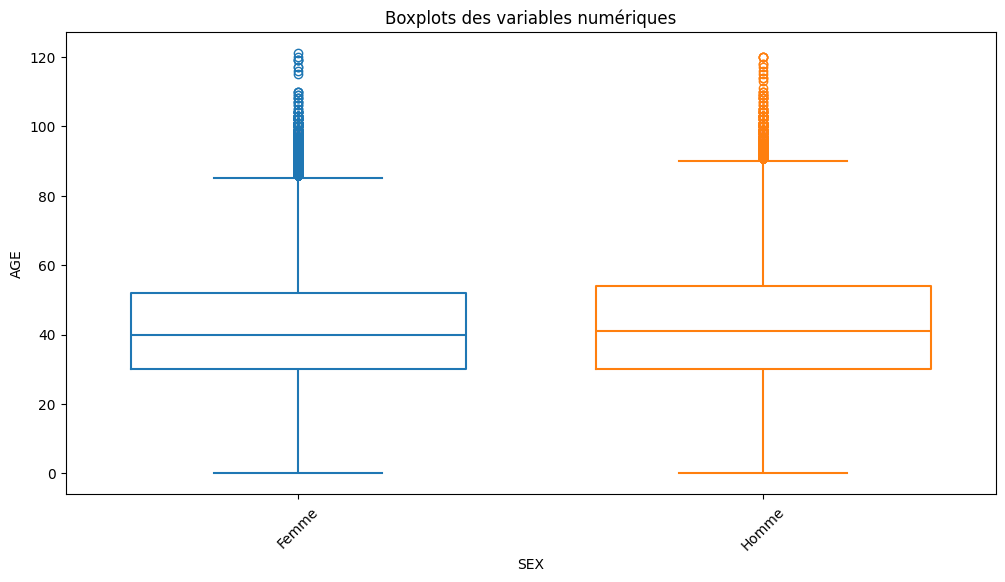

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot avec seaborn
plt.figure(figsize=(12,6))
sns.boxplot(x='SEX', y='AGE', data=covid, hue='SEX', fill=False, gap=.1, native_scale=True)
plt.title("Boxplots des variables numériques")
plt.xticks(rotation=45)
plt.show()

La mojorité de patient entre le premier  quartile(Q1 = 25 ans )  et troisieme quartile (Q3 = 50)  et avec un âge  minimun = 0 probablement  de nouveau-née et une âge maximun autour de 80 ans , donc  les personnes âgées plus de 80 ans  on peut les suprimer car elles presentent des données aberantes  en plus  elle presente niveau de vie faible qui peux être pas grand chose sur analise de personne qui est mort à cause de la covid  

In [7]:
Q1 = covid['AGE'].quantile(0.25)
Q3 = covid['AGE'].quantile(0.75)

IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR


covid = covid[(covid['AGE'] >= borne_inf) & (covid['AGE'] <= borne_sup)]

On supprime les personnes âgées de plus de 80 ans car elles ont généralement un niveau de vie plus fragile. Cette exclusion ne modifie pas significativement l’analyse des décès dus au COVID-19, car l’objectif est de se concentrer sur les groupes d’âge où l’impact du virus est le plus pertinent pour la prévention et la prise en charge.

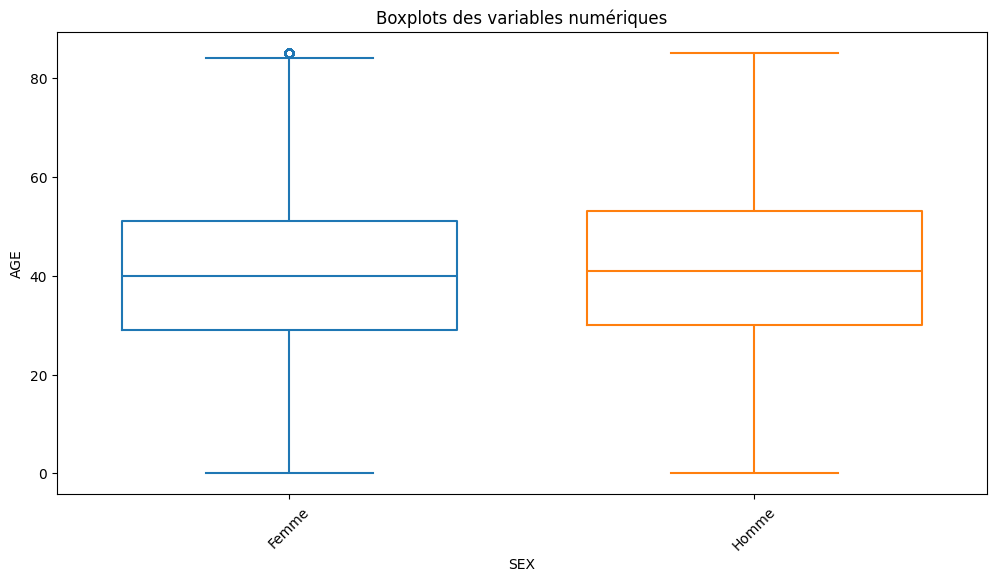

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot avec seaborn
plt.figure(figsize=(12,6))
sns.boxplot(x='SEX', y='AGE', data=covid, hue='SEX', fill=False, gap=.1, native_scale=True)
plt.title("Boxplots des variables numériques")
plt.xticks(rotation=45)
plt.show()

In [ ]:
covid['DATE_DIED'] = pd.to_datetime(covid['DATE_DIED'], errors='coerce')


Convertir DATE_DIED en datetime

In [10]:
covid = covid[((covid['DATE_DIED'] != '9999-99-99'))]

On supprime les données contenant la date 9999-99-99 car cette date n’est pas précise et ne permet pas de faire une analyse fiable. 

In [11]:
import numpy as np

variables = covid.select_dtypes(include=['int', 'int64']).columns.tolist()

# Condition : lignes où aucune des colonnes int a 97,98,99 
mask = (~covid[variables].isin([97, 98, 99]).any(axis=1))

covid_clean = covid[mask]

Supprimer les lignes contenant les valeurs 97, 98 et 99 dans toutes les colonnes, car elles indiquent l’absence d’informations fiables, tandis que les autres valeurs conservent leur signification médicale.

In [12]:
covid_clean.loc[:, 'DATE_DIED'] = pd.to_datetime(covid_clean['DATE_DIED'], errors='coerce')

Convertir DATE_DIED en datetime

In [13]:
covid_clean.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,Homme,2,2020-09-06,1,2,55,nom applicable,1,...,2,2,2,2,2,2,2,2,3,2
5,2,1,Femme,2,NaT,2,1,40,pas enceinte,2,...,2,2,2,2,2,2,2,2,3,2
8,2,1,Femme,2,NaT,2,2,37,pas enceinte,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,Femme,2,NaT,2,2,25,pas enceinte,2,...,2,2,2,2,2,2,2,2,3,2
11,2,1,Homme,2,NaT,2,2,24,nom applicable,2,...,2,2,2,2,2,2,2,2,3,2


La colonne DATE_DIED contient des valeurs manquantes (NaT). Pour garantir la précision de l’analyse.

In [14]:
covid_clean = covid_clean.dropna(axis=0)

In [19]:
covid_clean['SEX'] = covid_clean['SEX'].map({'Homme': 1, 'Femme': 2}).astype(int)
covid_clean['PREGNANT'] = covid_clean['PREGNANT'].map({'enceinte': 1, 'pas enceinte': 2, 'nom applicable': 3}).astype(int)

On remplace les valeurs catégoriques  par des codes numériques pour faciliter l'analyse 

In [20]:
covid_clean.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
DATE_DIED               128
INTUBED                   2
PNEUMONIA                 2
AGE                      86
PREGNANT                  3
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
ICU                       2
dtype: int64

Cela permet de visualiser la diversité des données dans chaque colonne.

In [17]:
covid_clean = covid_clean.drop(['PATIENT_TYPE'], axis=1)

La colonne PATIENT_TYPE contient une seule valeur unique pour toutes les données, donc nous la supprimons car elle n’apporte aucune information utile pour notre analyse

In [21]:
covid_clean.to_csv('../datas/covid_clean.csv', index=False)

Cette ligne permet de sauvegarder les données nettoyées dans un fichier CSV sans inclure l’index.